# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for Holding lat_lngs & Cities
lat_lngs = []
cities = []

# Create a Set of Random lat & lng Combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify Nearest City for Each lat, lng Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)

# Print the City Count to Confirm Sufficient Count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data(URL)
url = url = "http://api.openweathermap.org/data/2.5/weather?appid=179a824b84e49bc6a67011fe2add49c8&units=imperial"

In [4]:
# Empty Lists 
city_name = []
country = []
date = []
lat = []
long = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Starting Points 

record = 1
set = 1

# Print 'Beginning Data Retrieval' Statement 
print(f"Beginning Data Retrieval")
print(f"-----------------------------------")

# Loop Through list of Cities
for i, city in enumerate(cities):
    # Group Cities in Sets of 50
    if (i % 50 == 0 and i >= 50):
        record = 0
        set += 1
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        print_city = response["name"]
        
        print("Processing Record %s of Set %s | %s" % (record, set, print_city))
        
        # Increase counter
        record= record + 1
                
             
    except:
        print("City not found. Skipping...")
    
    continue

# Ending statement
print("----------------------------------")
print("Data Retrieval Complete           ")
print("----------------------------------")

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | Hermanus
Processing Record 2 of Set 1 | Cape Town
City not found. Skipping...
Processing Record 3 of Set 1 | Biak
Processing Record 4 of Set 1 | Lavrentiya
Processing Record 5 of Set 1 | Chunoyar
Processing Record 6 of Set 1 | Hobart
Processing Record 7 of Set 1 | Kapaa
Processing Record 8 of Set 1 | Port Hardy
Processing Record 9 of Set 1 | Lebu
Processing Record 10 of Set 1 | Praia da Vitória
Processing Record 11 of Set 1 | Aguadilla
Processing Record 12 of Set 1 | Brandon
City not found. Skipping...
Processing Record 13 of Set 1 | Port Elizabeth
Processing Record 14 of Set 1 | Atar
Processing Record 15 of Set 1 | Isangel
Processing Record 16 of Set 1 | Ixtapa
Processing Record 17 of Set 1 | Poum
Processing Record 18 of Set 1 | Ust-Kuyga
Processing Record 19 of Set 1 | Saldanha
Processing Record 20 of Set 1 | Severo-Kuril'sk
Processing Record 21 of Set 1 | Tabou
Processing Record 22 of Set 1 |

Processing Record 2 of Set 5 | Dikson
Processing Record 3 of Set 5 | Ambilobe
Processing Record 4 of Set 5 | Antonina
City not found. Skipping...
Processing Record 5 of Set 5 | Paamiut
Processing Record 6 of Set 5 | Ola
Processing Record 7 of Set 5 | Lorengau
Processing Record 8 of Set 5 | Ponta Delgada
Processing Record 9 of Set 5 | Plettenberg Bay
Processing Record 10 of Set 5 | Murray Bridge
Processing Record 11 of Set 5 | Yar-Sale
Processing Record 12 of Set 5 | Hamilton
Processing Record 13 of Set 5 | Snyder
Processing Record 14 of Set 5 | Wanaka
Processing Record 15 of Set 5 | Muncar
Processing Record 16 of Set 5 | Ambulu
Processing Record 17 of Set 5 | Lianran
Processing Record 18 of Set 5 | Dongxing
City not found. Skipping...
Processing Record 19 of Set 5 | Carnarvon
Processing Record 20 of Set 5 | Yulara
City not found. Skipping...
Processing Record 21 of Set 5 | Liwale
Processing Record 22 of Set 5 | Linxia Chengguanzhen
Processing Record 23 of Set 5 | Kruisfontein
City not 

Processing Record 5 of Set 9 | Shingū
Processing Record 6 of Set 9 | Umluj
Processing Record 7 of Set 9 | Biarritz
Processing Record 8 of Set 9 | Dekar
Processing Record 9 of Set 9 | Longyearbyen
Processing Record 10 of Set 9 | Altagracia de Orituco
Processing Record 11 of Set 9 | Peleduy
Processing Record 12 of Set 9 | Panabá
Processing Record 13 of Set 9 | Ascension
Processing Record 14 of Set 9 | Svobodnyy
Processing Record 15 of Set 9 | Orsha
Processing Record 16 of Set 9 | Bengkulu
Processing Record 17 of Set 9 | Saint-Joseph
City not found. Skipping...
Processing Record 18 of Set 9 | Alice Springs
Processing Record 19 of Set 9 | Villa Rica
Processing Record 20 of Set 9 | Limbang
Processing Record 21 of Set 9 | Torbay
Processing Record 22 of Set 9 | Benguela
Processing Record 23 of Set 9 | Quatre Cocos
Processing Record 24 of Set 9 | Duluth
Processing Record 25 of Set 9 | Beauceville
Processing Record 26 of Set 9 | Constantine
Processing Record 27 of Set 9 | Zyryanka
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dataFram
weather_dic ={
    "City": city_name,
    "Latitude": lat, 
    "Longityde": long,
    "Date": date,
    "Max Temp": temp, 
    "Humidity": humidity,
    "Cloudiness": cloudiness, 
    "Wind Speed": wind_speed, 
    "Country": country,
}

# make data frame
weather_data = pd.DataFrame(weather_dic)
weather_data.count()

City          556
Latitude      556
Longityde     556
Date          556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
dtype: int64

In [6]:
# Display and save as csv
weather_data.head()


,City,Latitude,Longityde,Date,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Hermanus,-34.42,19.23,1604782155,64.00,64,0,8.01,ZA
1,Cape Town,-33.93,18.42,1604782228,64.00,82,75,18.34,ZA
2,Biak,-0.91,122.88,1604782210,77.43,76,98,6.42,ID
3,Lavrentiya,65.58,-171.00,1604782147,28.69,96,53,10.00,RU
4,Chunoyar,57.45,97.32,1604782228,36.14,94,100,5.50,RU


In [7]:
# Output File into a CSV file
weather_data.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

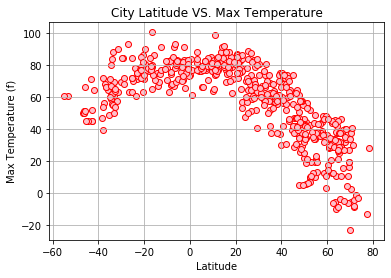

In [8]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], facecolors="pink", edgecolor="red")
plt.title("City Latitude VS. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")
plt.grid(True)

plt.savefig('output_data/City_Lat_vs_Max_Temp.png')

plt.show()

#### Latitude vs. Humidity Plot

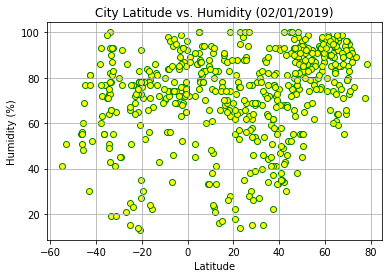

In [11]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="yellow", marker="o", edgecolor="green")
plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/City_Lat_vs_Humidity.png')

plt.show()



#### Latitude vs. Cloudiness Plot

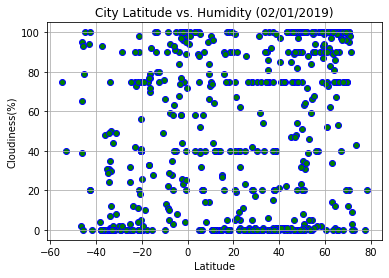

In [12]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="green", marker="o", edgecolor="blue")
plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/City_Lat_vs_Cloudiness.png')

plt.show()

#### Latitude vs. Wind Speed Plot

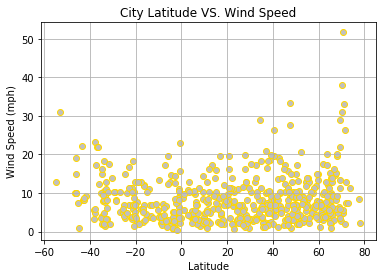

In [13]:
plt. scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors = 'silver', edgecolor = 'gold')
plt.title("City Latitude VS. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig('output_data/City_Lat_vs_Wind_speed.png')

plt.show()

In [14]:
# Description of Observable Trends based on the data

# Correlation between Latitude and Temperature
# - There's a positive corrlationship between Low Latitude and Temperature. as latitude rises up, the city temperature increases as well until the latitude reach 20,
#   if the latitude reaches more than 20, it change to negative corrlationship between Latitude and Temperature. as latitude rises up, the city temperature decreases.


# Correlation between Latitude and Humidity
# - There's no significant correlationship between latitude and Humidity. 

# Correlation between Latitude and Cloudiness
# - There's no significant correlationship between latitude and Cloudiness.

# Correlation between Latitude and Wind Speed
# - There's no significant correlationship between latitude and Humdity. Most of the cities have low wind speed regardless of the latitude.

